# Introduction

## Tensors

### tf.constant

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


0 order tensor

In [3]:
scalar = tf.constant(8)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [4]:
scalar.ndim

0

1st order tensor

In [5]:
vector = tf.constant([8,2])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([8, 2], dtype=int32)>

In [6]:
vector.ndim

1

2nd order tensor

In [7]:
matrix = tf.constant([[8,2],
                      [2,1]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[8, 2],
       [2, 1]], dtype=int32)>

In [8]:
matrix.ndim

2

3rd order tensor

In [9]:
cube = tf.constant([[[8,2],
                     [2,1]],
                    
                    [[1,2],
                     [4,1]]])
cube

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[8, 2],
        [2, 1]],

       [[1, 2],
        [4, 1]]], dtype=int32)>

In [10]:
cube.ndim

3

### tf.Variable

In [11]:
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])

changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [12]:
changeable_tensor[0].assign(20)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([20,  7], dtype=int32)>

In [13]:
try:
  unchangeable_tensor[0].assign(20)
  unchangeable_tensor
except AttributeError as err:
  print(err)

'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'


As we see we cannot change attribute in tf.constant tensor but we certainly can do that by assign argument in tf.Variable

### Create Random Tensor

In [14]:
import tensorflow as tf

random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape = (3,2))
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.uniform(shape = (3,2))

random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193765, -1.8107855 ]], dtype=float32)>

In [15]:
random_2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.7493447 , 0.73561966],
       [0.45230794, 0.49039817],
       [0.1889317 , 0.52027524]], dtype=float32)>

### Shuffle the order of tensor

#### set_seed

In [16]:
import tensorflow as tf

not_shuffled = tf.constant([[10,7],
                            [11,2],
                            [15,2]])

not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [11,  2],
       [15,  2]], dtype=int32)>

In [17]:
tf.random.shuffle(not_shuffled, seed = 42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[15,  2],
       [11,  2],
       [10,  7]], dtype=int32)>

In [18]:
tf.random.shuffle(not_shuffled, seed = 42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[15,  2],
       [11,  2],
       [10,  7]], dtype=int32)>

In [19]:
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11,  2],
       [15,  2],
       [10,  7]], dtype=int32)>

In [20]:
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[15,  2],
       [10,  7],
       [11,  2]], dtype=int32)>

In [21]:
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed = 42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [11,  2],
       [15,  2]], dtype=int32)>

#### numpy arrays to tensors

Tensors might be run much faster on a GPU

In [22]:
import numpy as np

tf.ones([10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [23]:
tf.zeros([10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [24]:
import numpy as np

numpy_a = np.arange(1, 25, dtype = np.int32)
numpy_a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [25]:
A = tf.constant(numpy_a, shape = (2,3,4))
A

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

## Getting Information from Tensors

### Shape

returns length of each dimension

In [26]:
A.shape

TensorShape([2, 3, 4])

### Rank

Returns rank of a tensor, rank 0 is a scalar, rank 1 is an array, rank 3 is a matrix, rank 4 is a cube, rank n is a n-tensor

In [27]:
A.ndim

3

### Axis or Dimension

Returns given dimensions values

In [28]:
A[0][1]

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([5, 6, 7, 8], dtype=int32)>

### Size

Returns total number of elements in the tensor

In [29]:
tf.size(A)

<tf.Tensor: shape=(), dtype=int32, numpy=24>

### Indexing

Get the first two elements of each dimenstion

In [30]:
import tensorflow as tf

B = tf.constant(np.arange(1,37,dtype = np.int32), shape = (3,2,3,2))
B

<tf.Tensor: shape=(3, 2, 3, 2), dtype=int32, numpy=
array([[[[ 1,  2],
         [ 3,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [11, 12]]],


       [[[13, 14],
         [15, 16],
         [17, 18]],

        [[19, 20],
         [21, 22],
         [23, 24]]],


       [[[25, 26],
         [27, 28],
         [29, 30]],

        [[31, 32],
         [33, 34],
         [35, 36]]]], dtype=int32)>

In [31]:
B[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=int32, numpy=
array([[[[ 1,  2],
         [ 3,  4]],

        [[ 7,  8],
         [ 9, 10]]],


       [[[13, 14],
         [15, 16]],

        [[19, 20],
         [21, 22]]]], dtype=int32)>

Get the first element from each dimension from each index except for the final one

In [32]:
import tensorflow as tf

B = tf.constant(np.arange(1,37,dtype = np.int32), shape = (3,2,3,2))
B

<tf.Tensor: shape=(3, 2, 3, 2), dtype=int32, numpy=
array([[[[ 1,  2],
         [ 3,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [11, 12]]],


       [[[13, 14],
         [15, 16],
         [17, 18]],

        [[19, 20],
         [21, 22],
         [23, 24]]],


       [[[25, 26],
         [27, 28],
         [29, 30]],

        [[31, 32],
         [33, 34],
         [35, 36]]]], dtype=int32)>

In [33]:
B[:, :1, :1, :1]

<tf.Tensor: shape=(3, 1, 1, 1), dtype=int32, numpy=
array([[[[ 1]]],


       [[[13]]],


       [[[25]]]], dtype=int32)>

### Extend dim

#### tf.newaxis

Create rank 2 tensor

In [34]:
r2 = tf.constant(np.arange(1,26), shape = (5,5))
r2

<tf.Tensor: shape=(5, 5), dtype=int64, numpy=
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])>

In [35]:
r2.ndim

2

Get the last item of each row

In [36]:
r2[:,-1]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([ 5, 10, 15, 20, 25])>

Add new dimension

In [37]:
r3 = r2[..., tf.newaxis] # ... means on every previous axis
r3

<tf.Tensor: shape=(5, 5, 1), dtype=int64, numpy=
array([[[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5]],

       [[ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]],

       [[11],
        [12],
        [13],
        [14],
        [15]],

       [[16],
        [17],
        [18],
        [19],
        [20]],

       [[21],
        [22],
        [23],
        [24],
        [25]]])>

In [38]:
r3 = r2[:, tf.newaxis, :]
r3

<tf.Tensor: shape=(5, 1, 5), dtype=int64, numpy=
array([[[ 1,  2,  3,  4,  5]],

       [[ 6,  7,  8,  9, 10]],

       [[11, 12, 13, 14, 15]],

       [[16, 17, 18, 19, 20]],

       [[21, 22, 23, 24, 25]]])>

In [39]:
r3 = r2[:,:,tf.newaxis]
r3

<tf.Tensor: shape=(5, 5, 1), dtype=int64, numpy=
array([[[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5]],

       [[ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]],

       [[11],
        [12],
        [13],
        [14],
        [15]],

       [[16],
        [17],
        [18],
        [19],
        [20]],

       [[21],
        [22],
        [23],
        [24],
        [25]]])>

In [40]:
r3 = r2[tf.newaxis, :, :]
r3

<tf.Tensor: shape=(1, 5, 5), dtype=int64, numpy=
array([[[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25]]])>

#### tf.expand_dims

In [41]:
tf.expand_dims(r2, axis = -1)

<tf.Tensor: shape=(5, 5, 1), dtype=int64, numpy=
array([[[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5]],

       [[ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]],

       [[11],
        [12],
        [13],
        [14],
        [15]],

       [[16],
        [17],
        [18],
        [19],
        [20]],

       [[21],
        [22],
        [23],
        [24],
        [25]]])>

In [42]:
tf.expand_dims(r2, axis = 0)

<tf.Tensor: shape=(1, 5, 5), dtype=int64, numpy=
array([[[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25]]])>

In [43]:
tf.expand_dims(r2, axis = 1)

<tf.Tensor: shape=(5, 1, 5), dtype=int64, numpy=
array([[[ 1,  2,  3,  4,  5]],

       [[ 6,  7,  8,  9, 10]],

       [[11, 12, 13, 14, 15]],

       [[16, 17, 18, 19, 20]],

       [[21, 22, 23, 24, 25]]])>

In [44]:
tf.expand_dims(r2, axis = 2)

<tf.Tensor: shape=(5, 5, 1), dtype=int64, numpy=
array([[[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5]],

       [[ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]],

       [[11],
        [12],
        [13],
        [14],
        [15]],

       [[16],
        [17],
        [18],
        [19],
        [20]],

       [[21],
        [22],
        [23],
        [24],
        [25]]])>

## Manipulating Tensors

In [45]:
import tensorflow as tf

t = tf.constant([[10,7],[3,4]])
t

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [46]:
tf.add(t, 10)# faster operation on GPU

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [47]:
tf.math.add(t, 10)# faster operation on GPU

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [48]:
t + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [49]:
t - 2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[8, 5],
       [1, 2]], dtype=int32)>

In [50]:
tf.subtract(t, 2)# faster operation on GPU

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[8, 5],
       [1, 2]], dtype=int32)>

In [51]:
tf.math.subtract(t, 2)# faster operation on GPU

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[8, 5],
       [1, 2]], dtype=int32)>

In [52]:
t * 2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 14],
       [ 6,  8]], dtype=int32)>

In [53]:
tf.multiply(t, 10) # faster operation on GPU

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [54]:
tf.math.multiply(t, 10) # faster operation on GPU

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [55]:
t / 4

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[2.5 , 1.75],
       [0.75, 1.  ]])>

In [56]:
tf.divide(t, 4)# faster operation on GPU

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[2.5 , 1.75],
       [0.75, 1.  ]])>

In [57]:
tf.math.divide(t,4)# faster operation on GPU

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[2.5 , 1.75],
       [0.75, 1.  ]])>

### Matrix multiplications

In [58]:
import tensorflow as tf
import numpy as np

t1 = tf.constant(np.arange(1,11), shape = (2,5))
t2 = tf.constant(np.arange(15,20), shape = (5,1))
t1

<tf.Tensor: shape=(2, 5), dtype=int64, numpy=
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])>

In [59]:
t2

<tf.Tensor: shape=(5, 1), dtype=int64, numpy=
array([[15],
       [16],
       [17],
       [18],
       [19]])>

#### tf.matmul

In [60]:
tf.linalg.matmul(t1, t2)

<tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[265],
       [690]])>

In [61]:
tf.matmul(t1, t2)

<tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[265],
       [690]])>

In [62]:
t1 @ t2

<tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[265],
       [690]])>

#### tf.reshape

In [63]:
t3 = tf.constant(np.arange(10), shape = (2,5))
t4 = tf.constant(np.arange(10,20), shape = (2,5))
t3

<tf.Tensor: shape=(2, 5), dtype=int64, numpy=
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])>

In [64]:
t4

<tf.Tensor: shape=(2, 5), dtype=int64, numpy=
array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])>

In [65]:
tf.reshape(t4, shape = (5,2))

<tf.Tensor: shape=(5, 2), dtype=int64, numpy=
array([[10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])>

In [66]:
t4

<tf.Tensor: shape=(2, 5), dtype=int64, numpy=
array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])>

The resulting matrix shape as same as the outer numbers of the matrices so 2x2

In [67]:
t3.shape, tf.reshape(t4, shape = (5,2)).shape

(TensorShape([2, 5]), TensorShape([5, 2]))

In [68]:
t3 @ tf.reshape(t4, shape = (5,2))

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[160, 170],
       [510, 545]])>

In [69]:
(t3 @ tf.reshape(t4, shape = (5,2))).shape

TensorShape([2, 2])

#### tf.transpose

With transpose instead of reshape

In [70]:
t4

<tf.Tensor: shape=(2, 5), dtype=int64, numpy=
array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])>

In [71]:
tf.reshape(t4, shape = (5,2))

<tf.Tensor: shape=(5, 2), dtype=int64, numpy=
array([[10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])>

Transpose swithces the axes when reshape just takes sequential indexes into desired shape

We get different matrix from transposition

In [72]:
tf.transpose(t4)

<tf.Tensor: shape=(5, 2), dtype=int64, numpy=
array([[10, 15],
       [11, 16],
       [12, 17],
       [13, 18],
       [14, 19]])>

In [73]:
t3 @ tf.transpose(t4)

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[130, 180],
       [430, 605]])>

#### Element wise

In [74]:
t1 * t1

<tf.Tensor: shape=(2, 5), dtype=int64, numpy=
array([[  1,   4,   9,  16,  25],
       [ 36,  49,  64,  81, 100]])>

#### tf.tensordot

In [75]:
t3, t3.shape, t4, t4.shape

(<tf.Tensor: shape=(2, 5), dtype=int64, numpy=
 array([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])>,
 TensorShape([2, 5]),
 <tf.Tensor: shape=(2, 5), dtype=int64, numpy=
 array([[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])>,
 TensorShape([2, 5]))

In [76]:
tf.tensordot(tf.transpose(t3), t4, axes = 1)

<tf.Tensor: shape=(5, 5), dtype=int64, numpy=
array([[ 75,  80,  85,  90,  95],
       [100, 107, 114, 121, 128],
       [125, 134, 143, 152, 161],
       [150, 161, 172, 183, 194],
       [175, 188, 201, 214, 227]])>

In [77]:
tf.matmul(tf.transpose(t3), t4)

<tf.Tensor: shape=(5, 5), dtype=int64, numpy=
array([[ 75,  80,  85,  90,  95],
       [100, 107, 114, 121, 128],
       [125, 134, 143, 152, 161],
       [150, 161, 172, 183, 194],
       [175, 188, 201, 214, 227]])>

### Changing data types

#### tf.cast

In [78]:
import tensorflow as tf

t1 = tf.constant([[1,2],[3,4]])
t1, t1.dtype # 32 bits int

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]], dtype=int32)>, tf.int32)

In [79]:
t2 = tf.constant([[1.2,2.5],[3,4]])
t2, t2.dtype # 32 bits int

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.2, 2.5],
        [3. , 4. ]], dtype=float32)>, tf.float32)

In [80]:
tf.cast(t1, dtype = tf.int16), tf.cast(t1, dtype = tf.int16).dtype # 16 bits float

(<tf.Tensor: shape=(2, 2), dtype=int16, numpy=
 array([[1, 2],
        [3, 4]], dtype=int16)>, tf.int16)

In [81]:
tf.cast(t2, dtype = tf.float16), tf.cast(t2, dtype = tf.float16).dtype # 16 bits float

(<tf.Tensor: shape=(2, 2), dtype=float16, numpy=
 array([[1.2, 2.5],
        [3. , 4. ]], dtype=float16)>, tf.float16)

### Aggregation

In [82]:
import tensorflow as tf
import numpy as np

t = tf.constant(np.random.randint(-100,100, size = 40), shape = (4,10))
t

<tf.Tensor: shape=(4, 10), dtype=int64, numpy=
array([[  88,   41,   77,  -91,  -12,  -40,   -8,   -9,   87,   33],
       [  25,  -77,   67,  -14,   98,    1,   26,  -31,  -76,  -82],
       [ -83,  -11,  -49,  -76, -100,   33,   96,   11,   47,   86],
       [  92,    9,  -72,   26,   79,  -44,  -29,  -49,  -77,  -48]])>

#### Absolute

In [83]:
tf.abs(t)

<tf.Tensor: shape=(4, 10), dtype=int64, numpy=
array([[ 88,  41,  77,  91,  12,  40,   8,   9,  87,  33],
       [ 25,  77,  67,  14,  98,   1,  26,  31,  76,  82],
       [ 83,  11,  49,  76, 100,  33,  96,  11,  47,  86],
       [ 92,   9,  72,  26,  79,  44,  29,  49,  77,  48]])>

In [84]:
tf.size(t), t.shape, t.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=40>, TensorShape([4, 10]), 2)

#### Minimum

In [85]:
tf.reduce_min(t)

<tf.Tensor: shape=(), dtype=int64, numpy=-100>

#### Maximum

In [86]:
tf.reduce_max(t)

<tf.Tensor: shape=(), dtype=int64, numpy=98>

#### Mean

In [87]:
tf.reduce_mean(t)

<tf.Tensor: shape=(), dtype=int64, numpy=-1>

#### Sum

In [88]:
tf.reduce_sum(t)

<tf.Tensor: shape=(), dtype=int64, numpy=-56>

#### Variance

In [89]:
t

<tf.Tensor: shape=(4, 10), dtype=int64, numpy=
array([[  88,   41,   77,  -91,  -12,  -40,   -8,   -9,   87,   33],
       [  25,  -77,   67,  -14,   98,    1,   26,  -31,  -76,  -82],
       [ -83,  -11,  -49,  -76, -100,   33,   96,   11,   47,   86],
       [  92,    9,  -72,   26,   79,  -44,  -29,  -49,  -77,  -48]])>

In [90]:
import tensorflow_probability as tfp

tfp.stats.variance(t) # Variance of each column

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([5000, 1863, 4468, 2231, 6233, 1000, 2247,  511, 5348, 4371])>

In [91]:
tfp.stats.variance(t, sample_axis = 1) # Variance of each row

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3143, 3458, 4501, 3278])>

In [92]:
t.numpy().var() # Variance of whole matrix, need to change to numpy and then var()

3708.9899999999993

In [93]:
# We can also count with numpy variance for rows and for columns

t.numpy().var(0)

array([5000.25  , 1862.75  , 4467.6875, 2230.6875, 6233.1875, 1000.25  ,
       2247.6875,  510.75  , 5348.1875, 4370.6875])

In [94]:
t.numpy().var(1)

array([3142.64, 3458.41, 4500.64, 3278.01])

#### Standard Deviation

Basicaly whole tensorflow use as default data type float32 (or optionaly float64) other datatypes might return an error

In [95]:
tf.math.reduce_std(tf.cast(t, tf.float32)) # here we need to change the values data type to float and use math, since this method doesn't have an alias. 

<tf.Tensor: shape=(), dtype=float32, numpy=60.901478>

In [96]:
t.numpy().std() # however we can just simply change tf to numpy and count std from there

60.9014778145818

#### Minimum and Maximum

In [97]:
import tensorflow as tf
import numpy as np

t = tf.random.uniform(shape = (10,5))
t

<tf.Tensor: shape=(10, 5), dtype=float32, numpy=
array([[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041],
       [0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686],
       [0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ],
       [0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ],
       [0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ],
       [0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173],
       [0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ],
       [0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ],
       [0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943],
       [0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]],
      dtype=float32)>

In [98]:
tf.argmax(t, axis = 1) # columns

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 2, 1, 0, 0, 3, 0, 2, 2, 3])>

In [99]:
tf.argmax(t, axis = 0) # rows

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([6, 7, 8, 5, 8])>

In [100]:
t.numpy().max() # maximum of whole tensor

0.9671384

In [101]:
tf.reduce_max(t) # maximum of whole tensor

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [102]:
tf.argmin(t, axis = 1) # columns

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([4, 4, 2, 1, 2, 2, 1, 0, 3, 2])>

In [103]:
tf.argmin(t, axis = 0) # rows

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([7, 3, 4, 8, 0])>

In [104]:
t.numpy().min() # minimum of whole tensor

0.009463668

In [105]:
tf.reduce_min(t) # minimum of whole tensor

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

#### Squaring

In [106]:
import tensorflow as tf

t = tf.random.uniform(shape = (2,10))
t

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.68789124, 0.48447883, 0.9309944 , 0.252187  , 0.73115396,
        0.89256823, 0.94674826, 0.7493341 , 0.34925628, 0.54718256],
       [0.26160395, 0.69734323, 0.11962581, 0.53484344, 0.7148968 ,
        0.87501776, 0.33967495, 0.17377627, 0.4418521 , 0.9008261 ]],
      dtype=float32)>

In [107]:
tf.square(t)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.47319436, 0.23471974, 0.86675054, 0.06359829, 0.53458613,
        0.79667807, 0.89633226, 0.56150156, 0.12197994, 0.29940876],
       [0.06843663, 0.4862876 , 0.01431033, 0.2860575 , 0.5110774 ,
        0.7656561 , 0.11537907, 0.03019819, 0.19523327, 0.8114877 ]],
      dtype=float32)>

In [108]:
tf.math.square(t)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.47319436, 0.23471974, 0.86675054, 0.06359829, 0.53458613,
        0.79667807, 0.89633226, 0.56150156, 0.12197994, 0.29940876],
       [0.06843663, 0.4862876 , 0.01431033, 0.2860575 , 0.5110774 ,
        0.7656561 , 0.11537907, 0.03019819, 0.19523327, 0.8114877 ]],
      dtype=float32)>

#### Sqrt

In [109]:
import tensorflow as tf

t = tf.random.uniform(shape = (2,10))
t

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.7413678 , 0.62854624, 0.01738465, 0.3431449 , 0.51063764,
        0.3777541 , 0.07321596, 0.02137029, 0.2871771 , 0.4710616 ],
       [0.6936141 , 0.07321334, 0.93251204, 0.20843053, 0.70105827,
        0.45856392, 0.8596262 , 0.92934334, 0.20291913, 0.76865506]],
      dtype=float32)>

In [110]:
tf.sqrt(t)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.8610272 , 0.79280907, 0.13185085, 0.5857857 , 0.7145891 ,
        0.61461705, 0.2705845 , 0.14618582, 0.535889  , 0.68633926],
       [0.832835  , 0.27057964, 0.9656666 , 0.45654193, 0.8372922 ,
        0.6771735 , 0.92716026, 0.96402454, 0.45046544, 0.8767297 ]],
      dtype=float32)>

In [111]:
import numpy as np
np.sqrt(0.5909029)

0.7687020879378434

#### log

In [112]:
import tensorflow as tf

t = tf.random.uniform(shape = (2,10))
t

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.7402308 , 0.33938193, 0.5692506 , 0.44811392, 0.29285502,
        0.4260056 , 0.62890387, 0.691061  , 0.30925727, 0.89236605],
       [0.66396606, 0.30541587, 0.8724164 , 0.1025728 , 0.56819403,
        0.25427842, 0.7253866 , 0.4770788 , 0.46289814, 0.88944995]],
      dtype=float32)>

In [113]:
tf.math.log(t)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[-0.30079326, -1.0806291 , -0.56343454, -0.8027078 , -1.2280777 ,
        -0.8533028 , -0.4637769 , -0.36952716, -1.1735817 , -0.11387886],
       [-0.40952426, -1.1860809 , -0.13648847, -2.2771826 , -0.5652923 ,
        -1.3693255 , -0.3210505 , -0.7400736 , -0.7702483 , -0.11715204]],
      dtype=float32)>

### Squeezing

In [114]:
import tensorflow as tf

t = tf.random.uniform(shape = (10,1,1,1,1))
t.shape, t

(TensorShape([10, 1, 1, 1, 1]),
 <tf.Tensor: shape=(10, 1, 1, 1, 1), dtype=float32, numpy=
 array([[[[[0.803156  ]]]],
 
 
 
        [[[[0.49777734]]]],
 
 
 
        [[[[0.37054038]]]],
 
 
 
        [[[[0.9118674 ]]]],
 
 
 
        [[[[0.637642  ]]]],
 
 
 
        [[[[0.18209696]]]],
 
 
 
        [[[[0.63791955]]]],
 
 
 
        [[[[0.27701473]]]],
 
 
 
        [[[[0.04227114]]]],
 
 
 
        [[[[0.84219384]]]]], dtype=float32)>)

In [115]:
y = tf.squeeze(t)
y.shape, y

(TensorShape([10]), <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.803156  , 0.49777734, 0.37054038, 0.9118674 , 0.637642  ,
        0.18209696, 0.63791955, 0.27701473, 0.04227114, 0.84219384],
       dtype=float32)>)

### One-hot Encoding

In [116]:
import tensorflow as tf

l = [1,2,3,4]

tf.one_hot(l, 4) # l is a list and 4 is a depth, so how many labels do we want to encode

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]], dtype=float32)>

In [117]:
tf.one_hot(l, 3)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [118]:
tf.one_hot(l, 4, on_value = 'on', off_value = 'off') # here instead of 0 we will get 'off' and instead of 1 we will get 'on'

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'off', b'on', b'off', b'off'],
       [b'off', b'off', b'on', b'off'],
       [b'off', b'off', b'off', b'on'],
       [b'off', b'off', b'off', b'off']], dtype=object)>

## Tensors and NumPy

In [119]:
import tensorflow as tf
import numpy as np

# create a tf from np
t = tf.constant(np.array([1,2,3,4,5]))
t

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 2, 3, 4, 5])>

In [120]:
# convert np to tf
np.array(t)

array([1, 2, 3, 4, 5])

In [121]:
t.numpy()

array([1, 2, 3, 4, 5])

Below we can see that tf created from numpay array as a default has 64 bit int or float value whereas tf is created from python list default dtype has 32 bits.

In [122]:
t1 = tf.constant(np.array([1,2,3,4]))
t2 = tf.constant([1,2,3,4])

t1.dtype, t2.dtype

(tf.int64, tf.int32)

In [123]:
t1 = tf.constant(np.array([1.,2.,3.,4.]))
t2 = tf.constant([1.,2.,3.,4.])

t1.dtype, t2.dtype

(tf.float64, tf.float32)

## Using tf.function

## Using GPUs or TPUs with TF

Here you can see what processors are in use

In [124]:
import tensorflow as tf

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [125]:
!nvidia-smi

Sat Feb 25 11:42:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    26W /  70W |    329MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

If we have an access to CUDE, tensorflow is going to use GPU whenever it's possible instead of CPU

## Exercises

In [126]:
import tensorflow as tf
import numpy as np

# 1. Create a vector, scalar, matrix and tensor with values of your choosing using tf.constant().
scalar = tf.constant([1])
print(scalar)

vector = tf.constant([1,2])
print(vector)

matrix = tf.constant([[1,2],[3,4]])
print(matrix)

tensor = tf.constant([[1,2,3],[1,2,3],[1,2,3]])
print(tensor)

tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


In [127]:
# 2. Find the shape, rank and size of the tensors you created in 1.
print('scalar',scalar.ndim)
print('vector',vector.ndim)
print('matrix',matrix.ndim)
print('tensor',tensor.ndim)

scalar 1
vector 1
matrix 2
tensor 2


In [128]:
# 3. Create two tensors containing random values between 0 and 1 with shape [5, 300].

t1 = tf.random.uniform(shape = (5,300))
t2 = tf.random.uniform(shape = (5,300))

t1, t2

(<tf.Tensor: shape=(5, 300), dtype=float32, numpy=
 array([[0.95831835, 0.01680839, 0.3156035 , ..., 0.67105925, 0.76730955,
         0.20125735],
        [0.09921694, 0.02475083, 0.47242153, ..., 0.9631474 , 0.34333456,
         0.8129494 ],
        [0.08817983, 0.9311962 , 0.2293179 , ..., 0.41450226, 0.008304  ,
         0.02438807],
        [0.54814565, 0.37019622, 0.5272658 , ..., 0.8656951 , 0.19644582,
         0.5959221 ],
        [0.8964087 , 0.15288067, 0.3360591 , ..., 0.5725572 , 0.4094149 ,
         0.40059018]], dtype=float32)>,
 <tf.Tensor: shape=(5, 300), dtype=float32, numpy=
 array([[0.43555546, 0.52486527, 0.49674678, ..., 0.00552487, 0.3156761 ,
         0.22303641],
        [0.93881905, 0.02025807, 0.8929347 , ..., 0.47184265, 0.93879664,
         0.27382708],
        [0.8537835 , 0.287457  , 0.57827055, ..., 0.22605908, 0.62864304,
         0.28893173],
        [0.83130777, 0.13316286, 0.4270022 , ..., 0.96334374, 0.81353974,
         0.47423255],
        [0.20213

In [129]:
# 4. Multiply the two tensors you created in 3 using matrix multiplication.

t1 * t2

<tf.Tensor: shape=(5, 300), dtype=float32, numpy=
array([[4.1740078e-01, 8.8221403e-03, 1.5677501e-01, ..., 3.7075176e-03,
        2.4222128e-01, 4.4887718e-02],
       [9.3146749e-02, 5.0140399e-04, 4.2184156e-01, ..., 4.5445400e-01,
        3.2232133e-01, 2.2260757e-01],
       [7.5286478e-02, 2.6767886e-01, 1.3260779e-01, ..., 9.3702003e-02,
        5.2202516e-03, 7.0464886e-03],
       [4.5567775e-01, 4.9296387e-02, 2.2514364e-01, ..., 8.3396196e-01,
        1.5981649e-01, 2.8260568e-01],
       [1.8119596e-01, 2.4391357e-02, 3.1900662e-01, ..., 5.3260678e-01,
        1.2729385e-01, 1.6529728e-01]], dtype=float32)>

In [130]:
# 5. Multiply the two tensors you created in 3 using dot product.

tf.matmul(t1, tf.transpose(t2))

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[73.45296 , 74.09731 , 74.092186, 73.01437 , 73.156876],
       [74.90098 , 75.27091 , 77.775635, 74.37875 , 74.90591 ],
       [83.04034 , 79.46228 , 82.300026, 80.63679 , 78.7219  ],
       [76.86667 , 76.41696 , 79.00328 , 77.386116, 77.40252 ],
       [76.20902 , 74.707855, 79.07422 , 75.523506, 73.94785 ]],
      dtype=float32)>

In [131]:
tf.matmul(tf.transpose(t1), t2)

<tf.Tensor: shape=(300, 300), dtype=float32, numpy=
array([[1.2227077 , 0.74635607, 1.7006097 , ..., 1.4339572 , 1.175743  ,
        0.89622366],
       [1.164247  , 0.35069013, 0.87213147, ..., 0.7211163 , 0.9626345 ,
        0.5182214 ],
       [1.2830186 , 0.3649675 , 1.2553747 , ..., 1.0970403 , 1.2207333 ,
        0.6547262 ],
       ...,
       [2.385793  , 0.6975059 , 2.3462267 , ..., 1.9184322 , 2.258906  ,
        1.1799669 ],
       [0.9096889 , 0.5035559 , 1.1650587 , ..., 0.738209  , 0.8568732 ,
        0.5296512 ],
       [1.4480615 , 0.2723792 , 1.4747108 , ..., 1.3369259 , 1.4514141 ,
        0.7224447 ]], dtype=float32)>

In [132]:
tf.matmul(tf.reshape(t1, (300,5)), t2)

<tf.Tensor: shape=(300, 300), dtype=float32, numpy=
array([[0.9802571 , 0.7294286 , 1.4205271 , ..., 0.9038221 , 0.8692382 ,
        0.68044996],
       [1.0373178 , 0.63988084, 1.3689739 , ..., 0.9168338 , 0.9317551 ,
        0.66094613],
       [1.4492459 , 0.6989448 , 1.1103034 , ..., 0.96827394, 1.2712358 ,
        0.7348511 ],
       ...,
       [1.3526613 , 0.5245875 , 1.4912858 , ..., 1.3427961 , 1.2327067 ,
        0.81545055],
       [2.5152001 , 0.9907487 , 2.2166743 , ..., 1.6714772 , 2.205762  ,
        1.2145045 ],
       [1.6495492 , 0.4251736 , 1.6096195 , ..., 1.2158446 , 1.5275803 ,
        0.76404625]], dtype=float32)>

In [133]:
tf.matmul(t1, tf.reshape(t2, (300,5)))

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[73.18031 , 74.87461 , 74.44004 , 71.073265, 68.95417 ],
       [74.776695, 75.75687 , 77.546814, 72.14329 , 73.153564],
       [81.712105, 81.39893 , 78.34574 , 76.58476 , 80.466705],
       [79.061226, 77.07333 , 76.17834 , 74.92463 , 75.26428 ],
       [77.532326, 76.81462 , 73.82923 , 73.76158 , 73.86308 ]],
      dtype=float32)>

In [134]:
# 6. Create a tensor with random values between 0 and 1 with shape [224, 224, 3].

t = tf.random.uniform(shape = (224, 224, 3))
t

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.14241445, 0.40161622, 0.33360183],
        [0.6816542 , 0.69087017, 0.22069418],
        [0.61336195, 0.9588975 , 0.3314948 ],
        ...,
        [0.21534526, 0.8758553 , 0.90849984],
        [0.913136  , 0.3300879 , 0.21957576],
        [0.294909  , 0.51060224, 0.41247094]],

       [[0.24516141, 0.0526433 , 0.8009639 ],
        [0.39559937, 0.91123044, 0.66148484],
        [0.62018025, 0.13185847, 0.2584139 ],
        ...,
        [0.69155025, 0.35061288, 0.7918345 ],
        [0.71887565, 0.13187587, 0.6776898 ],
        [0.91522217, 0.72013485, 0.5736792 ]],

       [[0.32997262, 0.01919758, 0.7673421 ],
        [0.37867343, 0.09564745, 0.07906318],
        [0.7100911 , 0.934427  , 0.5622425 ],
        ...,
        [0.8063401 , 0.53997624, 0.9590297 ],
        [0.7728716 , 0.5758432 , 0.53311133],
        [0.00398016, 0.15231979, 0.6468185 ]],

       ...,

       [[0.3400538 , 0.40921474, 0.04457414],
        [0.86

In [135]:
# 7. Find the min and max values of the tensor you created in 6 along the first axis.

t1.numpy().min()

0.0002361536

In [136]:
t1.numpy().max()

0.99991286

In [137]:
tf.argmax(t1)

<tf.Tensor: shape=(300,), dtype=int64, numpy=
array([0, 2, 3, 4, 4, 4, 4, 4, 3, 2, 0, 3, 4, 2, 4, 3, 1, 2, 1, 3, 2, 4,
       4, 1, 0, 4, 0, 1, 2, 4, 2, 1, 4, 2, 0, 2, 0, 4, 3, 0, 2, 4, 4, 1,
       3, 0, 4, 3, 4, 3, 2, 4, 4, 0, 0, 2, 0, 3, 4, 3, 3, 0, 3, 4, 2, 2,
       3, 1, 4, 2, 3, 1, 3, 1, 0, 1, 4, 0, 2, 0, 0, 2, 3, 3, 4, 3, 0, 2,
       1, 2, 0, 2, 0, 4, 1, 0, 4, 3, 3, 2, 2, 2, 1, 4, 4, 3, 4, 1, 0, 1,
       0, 2, 2, 0, 3, 1, 0, 3, 2, 2, 2, 4, 3, 4, 4, 4, 3, 4, 0, 4, 3, 2,
       2, 2, 1, 0, 2, 1, 3, 4, 1, 3, 2, 0, 3, 2, 0, 4, 0, 4, 4, 0, 2, 2,
       0, 0, 1, 2, 1, 1, 4, 1, 2, 2, 2, 4, 3, 3, 1, 3, 4, 1, 2, 3, 0, 1,
       0, 1, 4, 1, 0, 4, 4, 2, 0, 2, 4, 1, 0, 4, 2, 1, 2, 0, 2, 2, 1, 2,
       0, 4, 3, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 1, 1, 2, 0, 3, 4, 3, 2, 1,
       0, 1, 3, 2, 0, 2, 0, 2, 1, 2, 2, 3, 3, 4, 0, 2, 4, 2, 0, 4, 4, 0,
       3, 1, 4, 1, 1, 0, 3, 4, 2, 0, 4, 4, 1, 2, 1, 4, 3, 1, 1, 3, 4, 4,
       3, 0, 4, 2, 3, 3, 2, 2, 3, 1, 4, 3, 0, 2, 3, 1, 4, 4, 0, 4, 4, 1,
     

In [138]:
tf.argmax(t1, axis = 1)

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([214,  67, 163,  15, 290])>

In [139]:
tf.argmin(t1)

<tf.Tensor: shape=(300,), dtype=int64, numpy=
array([2, 0, 2, 2, 1, 2, 1, 3, 0, 3, 1, 0, 3, 4, 0, 4, 4, 4, 3, 2, 3, 1,
       1, 4, 4, 0, 1, 4, 3, 1, 1, 3, 3, 1, 4, 1, 2, 3, 0, 1, 3, 1, 3, 4,
       4, 3, 2, 4, 3, 4, 3, 0, 2, 4, 1, 1, 3, 2, 2, 4, 1, 4, 1, 0, 1, 3,
       4, 2, 0, 0, 0, 4, 4, 0, 3, 2, 0, 4, 4, 1, 1, 0, 0, 0, 2, 4, 4, 3,
       3, 3, 2, 4, 4, 0, 3, 4, 0, 1, 0, 1, 1, 3, 0, 0, 0, 1, 3, 3, 4, 0,
       4, 1, 0, 4, 2, 3, 4, 1, 3, 3, 1, 0, 1, 1, 2, 0, 4, 0, 1, 1, 2, 4,
       0, 0, 3, 2, 1, 3, 1, 1, 4, 0, 1, 4, 1, 3, 1, 2, 4, 1, 0, 4, 1, 3,
       3, 1, 0, 4, 4, 2, 3, 4, 4, 0, 4, 3, 0, 1, 3, 0, 3, 3, 0, 2, 1, 4,
       2, 0, 2, 2, 4, 0, 1, 1, 2, 4, 0, 2, 3, 3, 0, 4, 0, 3, 4, 3, 4, 3,
       3, 0, 4, 1, 2, 2, 4, 2, 0, 4, 0, 0, 4, 0, 4, 1, 2, 0, 1, 1, 3, 0,
       4, 0, 0, 0, 2, 1, 2, 3, 3, 3, 4, 1, 4, 0, 4, 3, 0, 4, 1, 3, 3, 2,
       2, 4, 2, 0, 4, 4, 1, 3, 3, 3, 0, 0, 0, 3, 4, 3, 4, 4, 2, 1, 2, 2,
       2, 2, 1, 0, 1, 2, 0, 0, 4, 2, 1, 2, 3, 0, 2, 0, 1, 3, 2, 1, 3, 2,
     

In [140]:
tf.argmin(t1, axis = 1)

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([ 82, 201, 265, 118,  34])>

In [141]:
# 8. Created a tensor with random values of shape [1, 224, 224, 3] then squeeze it to change the shape to [224, 224, 3].

In [142]:
t = tf.random.uniform(shape = (1, 224, 224, 3))
t.shape

TensorShape([1, 224, 224, 3])

In [143]:
t2 = tf.squeeze(t)
t2.shape

TensorShape([224, 224, 3])

In [144]:
# 9. Create a tensor with shape [10] using your own choice of values, then find the index which has the maximum value.

t = tf.random.uniform(shape = (1,20)) * 10
max = t.numpy().max()
max

9.832333

In [145]:
t

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[1.2780273 , 8.623013  , 4.1563296 , 1.0028672 , 6.078365  ,
        7.905217  , 0.6068337 , 8.567465  , 7.2001266 , 6.800433  ,
        3.1800735 , 9.155186  , 9.832333  , 9.490996  , 9.27691   ,
        4.2643223 , 1.6564941 , 0.59687734, 1.0153198 , 3.4836876 ]],
      dtype=float32)>

Here we can use tf.where and we will get the index of here highest value which is in (0, 9) index

In [146]:
tf.where(t == max).numpy()

array([[ 0, 12]])

In [147]:
# 10. One-hot encode the tensor of 10 random numbers shape = (1,10)
import tensorflow as tf

# Tworzenie tensora z losowymi liczbami całkowitymi
tensor = tf.constant(np.arange(10))
tensor

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [148]:
tf.one_hot(tensor, len(tensor))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [149]:
# 11. Read through the list of TensorFlow Python APIs, pick one we haven't gone through in this notebook, 
#     reverse engineer it (write out the documentation code for yourself) and figure out what it does.

import tensorflow as tf

indices = [1,2,4]
dims = [3,3]

tf.unravel_index(
    indices, dims, name=None
)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 0, 1],
       [1, 2, 1]], dtype=int32)>

unravel_index works as follows:

1. in matrix with dims defined by argument dims so up here with 3,3 matrix


```
[1,2,0]
[4,0,0]
[0,0,0]

```

and check the indexes of given in indeces list indexes so up here 1st, 2nd and 4th. Then it returns indexes of those numbers, so for 1 it's (0,1), for 2 it's (0,2) and for 4 it's (1,1). All indexes are shown in matrix

In [150]:
# 12. Try to create a series of tensor functions to calculate your most recent grocery bill 
# (it's okay if you don't use the names of the items, just the price in numerical form).
# How would you calculate your grocery bill for the month and for the year using tensors?

import tensorflow as tf

t = tf.constant([[1,15,20,40,23,12],[14,51,24,5,0,0]])
t

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 1, 15, 20, 40, 23, 12],
       [14, 51, 24,  5,  0,  0]], dtype=int32)>

In [151]:
t.numpy().sum()

205

In [152]:
# 13. Go through the TensorFlow 2.x quick start for beginners tutorial 
# (be sure to type out all of the code yourself, even if you don't understand it).
# Are there any functions we used in here that match what's used in there? Which are the same? Which haven't you seen before?

import tensorflow as tf

print(tf.__version__)

2.11.0


In [153]:
# LOAD DATASET

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 1s 0us/step


In [154]:
# BUILD A MODEL

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

# CHECK PREDICTIONS FOR 1 TENSOR

predictions = model(x_train[:1]).numpy()
predictions

array([[-0.31785303, -0.3739301 ,  0.17879969,  0.29022092, -0.13548946,
         0.15100014, -0.07124239, -0.3017125 , -0.05181977,  0.15066381]],
      dtype=float32)

In [155]:
# CHANGE LOGITS TO PROBABILITIES OF EACH CLASSES

tf.nn.softmax(predictions).numpy()

array([[0.0745038 , 0.07044084, 0.12242553, 0.1368553 , 0.08940832,
        0.11906903, 0.09534108, 0.07571609, 0.09721097, 0.11902899]],
      dtype=float32)

In [156]:
# LOSS FUNCTION

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
loss_fn

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

In [157]:
tf.math.log(1/10).numpy()

-2.3025851

In [158]:
loss_fn(y_train[:1], predictions).numpy()

2.1280518

In [159]:
# COMPILE

model.compile(optimizer = 'adam',
              loss = loss_fn,
              metrics = ['accuracy'])

In [160]:
# FIT

model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2993 - accuracy: 0.9123
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1464 - accuracy: 0.9565
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1096 - accuracy: 0.9667
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0903 - accuracy: 0.9721
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0747 - accuracy: 0.9766


In [161]:
# EVALUATE

model.evaluate(x_test, y_test, verbose = 2)

313/313 - 1s - loss: 0.0768 - accuracy: 0.9761 - 662ms/epoch - 2ms/step


[0.07679152488708496, 0.9761000275611877]

If you want to grab probability you can grab your model and add Softmax function as a last layer.

In [162]:
# PROBABILITIES

probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax() 
])

solution = probability_model(x_test[:5])
solution

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.8485243e-07, 3.0319711e-09, 1.0757329e-05, 2.3902633e-04,
        7.4913617e-12, 6.0469097e-07, 5.8732220e-12, 9.9974149e-01,
        3.5122028e-08, 7.7451241e-06],
       [3.6247243e-08, 6.1311925e-06, 9.9998248e-01, 1.2330023e-06,
        2.3961901e-15, 1.7767292e-06, 4.6816937e-09, 1.0484362e-12,
        8.3343584e-06, 1.6881555e-13],
       [2.7470165e-07, 9.9836284e-01, 1.2142943e-04, 3.8201557e-05,
        8.3765488e-05, 7.3986193e-05, 7.6705810e-06, 1.1030615e-03,
        1.9268075e-04, 1.6145259e-05],
       [9.9982649e-01, 2.6133104e-10, 1.3551021e-04, 1.4723807e-08,
        2.1502319e-07, 1.9336924e-06, 2.9463154e-05, 7.5299675e-07,
        1.1644952e-09, 5.6034623e-06],
       [1.0743636e-05, 9.5916773e-12, 1.3708858e-05, 1.7382420e-09,
        9.8727894e-01, 2.4719507e-06, 8.3341974e-06, 1.1447027e-05,
        1.5006643e-06, 1.2672875e-02]], dtype=float32)>

In [163]:
# SOLUTIONS, SO NUMBER OF LALBES WITH HIGHES PROBABILITY FOR EACH ROW

tf.argmax(solution, axis = 1).numpy()

array([7, 2, 1, 0, 4])

# Neural Network Regression

## Hyperparameters

Hyperparameters in Nerual Networks

* Input Layer Shape - Same shape as number of features 
* Hidden Layers - Problem specific, minimum = 1, maximum = unlimited
* Neurons per hidden layer - Problem specific, usually from 10 to 100
* Output Layer Shape - Same shape as desired prediction shape (e.g. 1 for price)
* Hidden Activation - usually ReLU (Rectified Linear Unit)
* Output Activation - usually None, ReLu, logistic/tanh
* Loss Function - MSE (Means Squared Error), MAE (Mean Absolute Error), Huber (combination of MSE and MAE) if outliers
* Optimizer - SGD (Stochastic Gradient Descent), Adam

## Introduction

In [164]:
# Import tf

import tensorflow as tf
tf.__version__ 

'2.11.0'

### Create a dataset

In [165]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

### Visualize

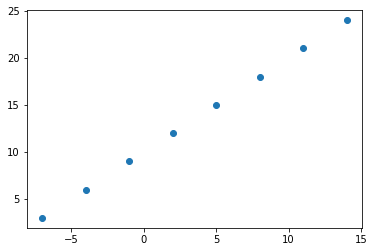

In [166]:
plt.scatter(X, y)

In [167]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [168]:
# Create demo tensor for house pricing
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [169]:
X[0], y[0]

(-7.0, 3.0)

In [170]:
X[1], y[1]

(-4.0, 6.0)

In [171]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

### Steps in modelling in Tensorflow

#### Creating a model

1. Creating a model - define input, output and hidden layers of the model

In [172]:
import tensorflow as tf

# set random seed
tf.random.set_seed = 42

# Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#### Compile a model

2. Compile a model - So defining

* loss function (function that tells the model how wrong it is)
* optimizer (tells the model how to improve the patterns its learning)
* evaluation metrics (how we're gonna interpret the performance of our model)

In [173]:
# Compile the model

model.compile(
    loss = tf.keras.losses.mae, # Mean Abs Error
    optimizer = tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
    metrics = ['mae']
)

#### Fitting a model

3. Fitting a model - letting a model try to find patterns between x and y or features and labels

In [174]:
X # you need to change into below

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

In [175]:
tf.expand_dims(X, axis = -1) # so from now on you just need to change the array into vertical

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [176]:
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [177]:
# Fit the model

model.fit(
    tf.expand_dims(X, axis = -1),
    # X,
    y,
    epochs = 5
)

Epoch 1/5
1/1 [==============================] - 0s 364ms/step - loss: 14.7833 - mae: 14.7833
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 14.6508 - mae: 14.6508
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 14.5183 - mae: 14.5183
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 14.3858 - mae: 14.3858
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 14.2533 - mae: 14.2533


#### Make a prediction

4. Make a prediction

In [178]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 84ms/step


array([[-3.2082872]], dtype=float32)

Our original formula y == X + 10

In [179]:
y_true = 17 + 10
y_true

27

And we've got 19.69. The gap is quite big

Also by looking at MAE we can tell that on average our model is wrong by 9.53 so when we will add this value to y_pred we will get

In [180]:
y_pred + 9.53

array([[6.3217125]], dtype=float32)

more than we should, so we can see that our prediction was off less than 9.53 which is okey when it comes to MAE

### Steps in model improvement

#### In Creating a model

* Adding more layers
* Increase number of hidden units
* Change activation function

In [181]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    # tf.keras.layers.Dense(100, activation = 'relu'),
    # tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model.fit(
    tf.expand_dims(X, axis = -1),
    y,
    epochs = 5
)

Epoch 1/5
1/1 [==============================] - 0s 438ms/step - loss: 12.3370 - mae: 12.3370
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.7656 - mae: 11.7656
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1873 - mae: 11.1873
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 10.5938 - mae: 10.5938
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 9.9777 - mae: 9.9777


In [182]:
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[12.070241]], dtype=float32)

Just by adding layers, hidden units and changing activation function our model is even worse

#### In Compiling a model

* Change optimization function
* Change Learning Rate of optimization function

In [183]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['mae']
)

model.fit(
    tf.expand_dims(X, axis = -1),
    y,
    epochs = 5
)

Epoch 1/5
1/1 [==============================] - 1s 715ms/step - loss: 16.4441 - mae: 16.4441
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 16.4435 - mae: 16.4435
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 16.4429 - mae: 16.4429
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 16.4423 - mae: 16.4423
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 16.4417 - mae: 16.4417


In [184]:
model.predict([17.0])

1/1 [==============================] - 0s 59ms/step


array([[-11.95282]], dtype=float32)

Just by changing optimization function and learning rate we have even worse prediction

#### In Fitting a model

* Fit a model for more epochs
* Give model more data

In [185]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model.fit(
    tf.expand_dims(X, axis = -1),
    y,
    epochs = 100
)

Epoch 1/100
1/1 [==============================] - 0s 329ms/step - loss: 21.1430 - mae: 21.1430
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 20.7498 - mae: 20.7498
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 20.3963 - mae: 20.3963
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 20.1151 - mae: 20.1151
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 19.8338 - mae: 19.8338
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 19.5526 - mae: 19.5526
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 19.2713 - mae: 19.2713
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 18.9901 - mae: 18.9901
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 18.7088 - mae: 18.7088
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 18.4276 - mae: 18.4276
Epoch 11/100
1/1 [==============================

In [186]:
model.predict([17.0])

1/1 [==============================] - 0s 77ms/step


array([[29.35866]], dtype=float32)

In [187]:
17 + 10

27

Just by rising our epochs up to 100 we signifficantly improved our model up to 2.95 off from our true value

#### ALL CHANGES TOGETHER

In [188]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

model.fit(
    tf.expand_dims(X, axis = -1),
    y,
    epochs = 100
)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 11.8634 - mae: 11.8634
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9472 - mae: 10.9472
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0253 - mae: 10.0253
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 9.1019 - mae: 9.1019
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1726 - mae: 8.1726
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4198 - mae: 7.4198
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 6.6972 - mae: 6.6972
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 5.9465 - mae: 5.9465
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 5.1672 - mae: 5.1672
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 4.3658 - mae: 4.3658
Epoch 11/100
1/1 [==============================] - 0s 9ms/step -

In [189]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 63ms/step


array([[26.889782]], dtype=float32)

In [190]:
y_true

27

In [191]:
mae = abs(y_pred - y_true)
mae

array([[0.11021805]], dtype=float32)

After tweaking hyperparameters we found best model with 
* one inner layer with 100 neurons and relu activation function
* adam optimizer with learning_rate of 0.01
* 100 epochs

Taking all into summary learning rate is the most important hyperparameter to tweak while building deep learning model

### Evaluating the model

In practice normal workflow of building a nerual network model is iteratively goes thourgh defining a model -> fit a model -> evaluate a model and again the same until good model is achieved.

So when we're building our model the most important thing is to experiment, while when we're evaluating our model the most important thing is to visualize. We can visualise:

* Data
* Model
* Training
* Prediction

In [192]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [193]:
# Make labels for the dataset

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Train / Val / Test

* Training set - 70-80% -> It's like learning from books
* Validation set - 10-15% this set is for tweaking the model to get good model structure -> It's like practice test
* Test set - 10-15% model is beaing evaluated on this never seen data -> It's like final exam



In [194]:
# Check length
len(X)
# Since data is not bigger than 100 we will skip validaition set for now

50

In [195]:
# Split
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

#### Data Visualisation

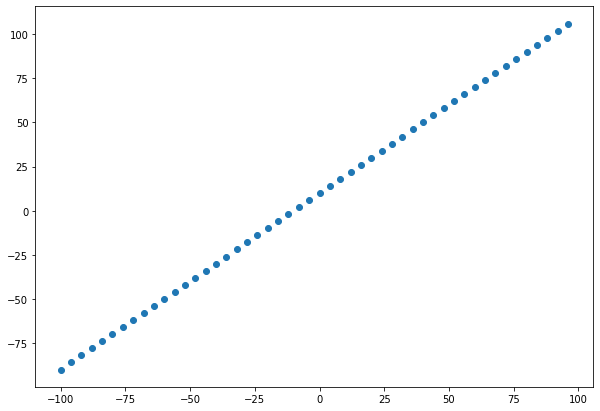

In [196]:
plt.figure(figsize = (10,7))
plt.scatter(X, y)

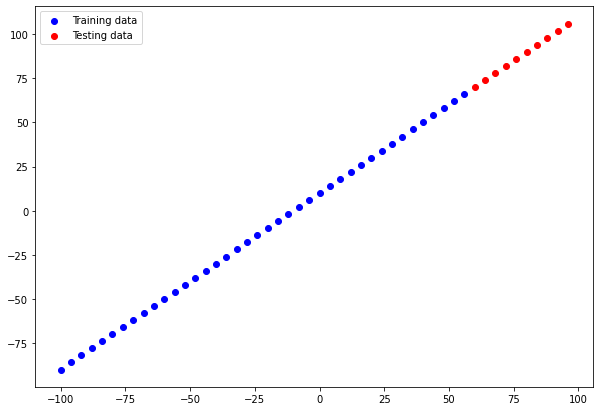

In [197]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c = 'b', label = 'Training data')
plt.scatter(X_test, y_test, c = 'r', label = 'Testing data')
plt.legend()

#### Model Visualisation

#### Training Visualisation

In [198]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [199]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = 'input_layer'),
    tf.keras.layers.Dense(1, name = 'output_layer') # input shape 1 because we're using 1 number to predict 1 number, shape of X[0] i null so it's a scalar value
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model.fit(
    tf.expand_dims(X_train, axis = -1),
    y_train,
    epochs = 5,
    verbose = 1
)

Epoch 1/5
2/2 [==============================] - 0s 8ms/step - loss: 32.2915 - mae: 32.2915
Epoch 2/5
2/2 [==============================] - 0s 7ms/step - loss: 24.4373 - mae: 24.4373
Epoch 3/5
2/2 [==============================] - 0s 7ms/step - loss: 30.7293 - mae: 30.7293
Epoch 4/5
2/2 [==============================] - 0s 8ms/step - loss: 22.7431 - mae: 22.7431
Epoch 5/5
2/2 [==============================] - 0s 7ms/step - loss: 13.6252 - mae: 13.6252


In [200]:
model.summary() 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Above we have following information:

* dense - means fully connected, so the neurons from given layer are connected to all neurons from next layer
* output shape - means what is the shape of output data from NN, here we have (None, 1) which simply means scalar
* total params - means weights, so number of all weights used in this model is 2
* trainable params - how meany weights are trained within a model
* non-trainable params - how many weights are freezed within a model. This is typically when we do transfer learning, so we have pre-trained weights that we just want to transfer to our model.

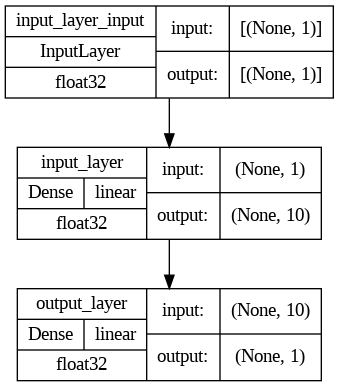

In [201]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True, show_dtype=True, show_layer_names = True, show_layer_activations =True)

#### Prediction Visualisation

In [202]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[62.185837],
       [66.3265  ],
       [70.467155],
       [74.60782 ],
       [78.74848 ],
       [82.88914 ],
       [87.0298  ],
       [91.17046 ],
       [95.31112 ],
       [99.45178 ]], dtype=float32)

In [203]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [204]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  
  plt.figure(figsize = (10,7))
  # plot training data
  plt.scatter(train_data, train_labels, c = 'b', label = 'Training data')
  # plot testing data
  plt.scatter(test_data, test_labels, c = 'g', label = 'Testing data')
  # plot model predictions
  plt.scatter(test_data, predictions, c = 'r', label = 'Predictions')

  plt.legend()

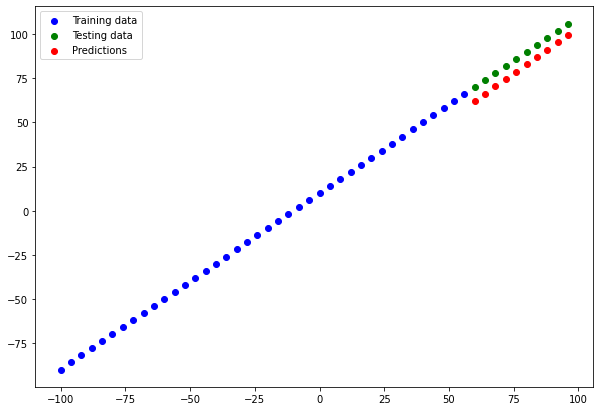

In [205]:
plot_predictions()

#### Evaluation Metrics

##### MAE - Mean Absolute Error

Good for any regression problem

In [206]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [207]:
y_pred

array([[62.185837],
       [66.3265  ],
       [70.467155],
       [74.60782 ],
       [78.74848 ],
       [82.88914 ],
       [87.0298  ],
       [91.17046 ],
       [95.31112 ],
       [99.45178 ]], dtype=float32)

In [208]:
y_test.shape

TensorShape([10])

In [209]:
y_pred

array([[62.185837],
       [66.3265  ],
       [70.467155],
       [74.60782 ],
       [78.74848 ],
       [82.88914 ],
       [87.0298  ],
       [91.17046 ],
       [95.31112 ],
       [99.45178 ]], dtype=float32)

we need to squeeze y_pred

In [210]:
# tf.keras.losses.mae()

tf.metrics.mean_absolute_error(y_true = y_test, 
                               y_pred = tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=7.1811905>

##### MSE - Mean Square Error

When larger errors are more significant than smaller errors

In [211]:
# tf.keras.losses.mse()

tf.metrics.mean_squared_error(y_true = y_test, 
                              y_pred = tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=51.732727>

##### Huber

Combination of MAE and MSE, less sensitive for outliers than MSE.

In [212]:
# tf.keras.losses.huber()

##### Evaluate model on test set

In [213]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 112ms/step - loss: 7.1812 - mae: 7.1812


[7.181190490722656, 7.181190490722656]

### Running Experiments to improve model

1. Get more data
2. Make your model larger - tweak some hyperparameters, add layers etc.
3. Train for longer - more epochs

Let's do 3 modelling experiments:

1. model_1 - same as the original model, 1 layer, 100 epochs
2. model_2 - 2 layers, 100 epochs
3. model_3 - 2 layers, 500 epochs

#### model_1

In [214]:
import tensorflow as tf

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model_1.fit(
    tf.expand_dims(X_train, axis = -1),
    y_train,
    epochs = 100,
    verbose = 2
)

Epoch 1/100
2/2 - 0s - loss: 59.1538 - mae: 59.1538 - 338ms/epoch - 169ms/step
Epoch 2/100
2/2 - 0s - loss: 24.5264 - mae: 24.5264 - 9ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 10.1303 - mae: 10.1303 - 9ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 12.4566 - mae: 12.4566 - 9ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 11.5083 - mae: 11.5083 - 12ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 10.6117 - mae: 10.6117 - 11ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 9.5660 - mae: 9.5660 - 9ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 9.0278 - mae: 9.0278 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 17.8367 - mae: 17.8367 - 10ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 9.6154 - mae: 9.6154 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 8.2124 - mae: 8.2124 - 9ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 10.2852 - mae: 10.2852 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 12.0312 - mae: 12.0312 - 9ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s 

In [215]:
y_pred_1 = tf.squeeze(model_1.predict(X_test))
y_pred_1, y_test

1/1 [==============================] - 0s 37ms/step


(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([44.394398, 47.268066, 50.141735, 53.015404, 55.889072, 58.76274 ,
        61.636406, 64.51007 , 67.38374 , 70.25741 ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [216]:
def mae_mse(y_test, y_pred):
  mae_1 = tf.metrics.mean_absolute_error(
      y_true = y_test,
      y_pred = y_pred
  )

  mse_1 = tf.metrics.mean_squared_error(
      y_true = y_test,
      y_pred = y_pred
  )

  return mae_1, mse_1

mae_mse(y_test, y_pred_1)

(<tf.Tensor: shape=(), dtype=float32, numpy=30.674097>,
 <tf.Tensor: shape=(), dtype=float32, numpy=951.36633>)

In [1]:
def scatter_predictions(X_train, y_train, X_test, y_test, y_pred):
  plt.figure(figsize = (10, 7))
  plt.scatter(X_train, y_train, label = 'training set')
  plt.scatter(X_test, y_test, label = 'testing set')
  plt.scatter(X_test, y_pred, label = 'predictions')

scatter_predictions(X_train, y_train, X_test, y_test, y_pred_1)

NameError: ignored

#### model_2

In [218]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mse']
)

model_2.fit(
    tf.expand_dims(X_train, axis = -1),
    y_train,
    epochs = 100
)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 35.4057 - mse: 1795.3909
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 28.9786 - mse: 1091.8815
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 32.7164 - mse: 1643.6130
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 14.1755 - mse: 274.7464
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 19.9269 - mse: 542.4137
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6486 - mse: 105.1217
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 16.3206 - mse: 344.8058
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 16.7690 - mse: 383.9617
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 29.1927 - mse: 1166.0686
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 13.6725 - mse: 233.5744
Epoch 11/100
2/2 [===========================

In [219]:
y_pred_2 = tf.squeeze(model_2.predict(X_test))
y_pred_2, y_test

1/1 [==============================] - 0s 68ms/step


(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 88.24961 ,  94.01142 ,  99.77322 , 105.53502 , 111.296814,
        117.05862 , 122.82041 , 128.58223 , 134.34402 , 140.10582 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [220]:
mae_2 = tf.metrics.mean_absolute_error(
    y_true = y_test,
    y_pred = y_pred_2
)

mse_2 = tf.metrics.mean_squared_error(
    y_true = y_test,
    y_pred = y_pred_2
)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=26.177715>,
 <tf.Tensor: shape=(), dtype=float32, numpy=710.88043>)

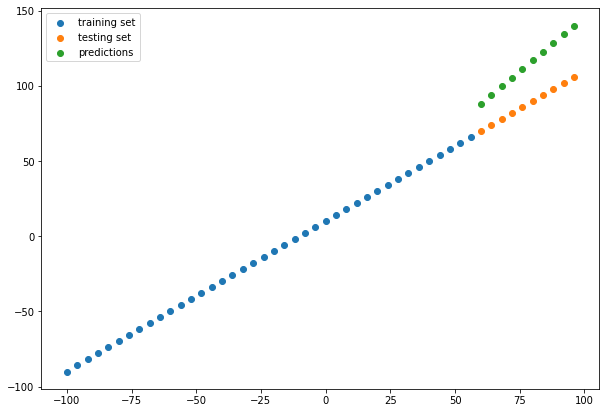

In [221]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, label = 'training set')
plt.scatter(X_test, y_test, label = 'testing set'),
plt.scatter(X_test, y_pred_2, label = 'predictions')
plt.legend()

#### model_3

In [222]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),

)

model_3.fit(
    tf.expand_dims(X_train, axis = -1),
    y_train,
    epochs = 500
)

Epoch 1/500
2/2 [==============================] - 1s 11ms/step - loss: 33.9992
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 28.2000
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 31.9261
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 14.3849
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 20.3175
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 8.1807
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 17.3432
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 17.2566
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 30.2367
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 12.1226
Epoch 11/500
2/2 [==============================] - 0s 7ms/step - loss: 9.0150
Epoch 12/500
2/2 [==============================] - 0s 7ms/step - loss: 21.2382
Epoch 13/500
2/2 [==============================] 

In [223]:
y_pred_3 = tf.squeeze(model_3.predict(X_test))
y_pred_3, y_test

1/1 [==============================] - 0s 75ms/step


(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([16.974312, 17.806522, 18.63873 , 19.470936, 20.303146, 21.135353,
        21.967564, 22.79977 , 23.63198 , 24.464184], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [224]:
mae_3 = tf.metrics.mean_absolute_error(
    y_true = y_test,
    y_pred = y_pred_3
)

mse_3 = tf.metrics.mean_squared_error(
    y_true = y_test,
    y_pred = y_pred_3
)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.28075>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4609.4873>)

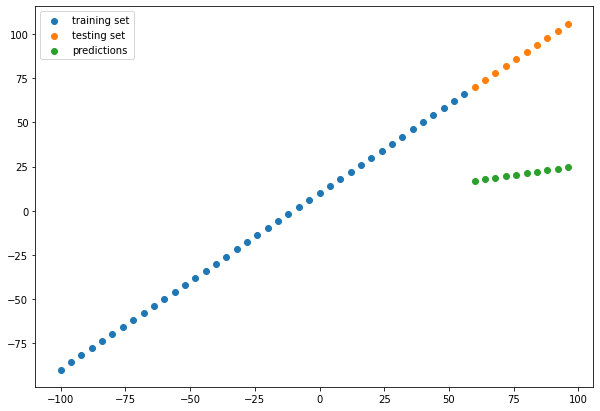

In [225]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, label = 'training set')
plt.scatter(X_test, y_test, label = 'testing set')
plt.scatter(X_test, y_pred_3, label = 'predictions')
plt.legend()

#### Comparing the results

In [226]:
def comparingRegressionResults(model_1 = model_1, mae_1 = mae_1, mse_1 = mse_1,
                               model_2 = model_2, mae_2 = mae_2, mse_2 = mse_2,
                               model_3 = model_3, mae_3 = mae_3, mse_3 = mse_3):
  import pandas as pd

  results = [['model_1', mae_1.numpy(), mse_1.numpy()],
            ['model_2', mae_2.numpy(), mse_2.numpy()],
            ['model_3', mae_3.numpy(), mse_3.numpy()]]

  all_results = pd.DataFrame(results, columns = ['model', 'mae', 'mse'])

  return all_results

In [227]:
comparingRegressionResults()

,model,mae,mse
0,model_1,30.674097,951.366333
1,model_2,26.177715,710.880432
2,model_3,67.280746,4609.487305


Looks like model_1 performed the best

#### Tracking experiments tools

* Tensorboard - https://www.tensorflow.org/tensorboard
* Weights and Biases - https://wandb.ai/site

### Saving Tensorflow models

#### SaveModel Format

Better used when we're going to use our saved model only within tensorflow

In [228]:
model_1.save('model_1')

#### HDF5 Format

Better for huge data models and when we're going to use model in some other environments than tensorflow

In [229]:
model_1.save('model_1.h5')

### Uploading a model

In [232]:
import tensorflow as tf

loaded_SavedModel_format = tf.keras.models.load_model('/content/model_1')
loaded_h5_format = tf.keras.models.load_model('model_1.h5')

loaded_SavedModel_format.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [233]:
loaded_h5_format.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


##### Predicting

In [238]:
y_pred_1_old = tf.squeeze(model_1.predict(X_test))
y_pred_1_old, y_test

1/1 [==============================] - 0s 20ms/step


(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([44.394398, 47.268066, 50.141735, 53.015404, 55.889072, 58.76274 ,
        61.636406, 64.51007 , 67.38374 , 70.25741 ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [240]:
y_pred_1_SavedModel = tf.squeeze(loaded_SavedModel_format.predict(X_test))
y_pred_1_SavedModel, y_test

1/1 [==============================] - 0s 19ms/step


(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([44.394398, 47.268066, 50.141735, 53.015404, 55.889072, 58.76274 ,
        61.636406, 64.51007 , 67.38374 , 70.25741 ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [241]:
y_pred_1_h5 = tf.squeeze(loaded_h5_format.predict(X_test))
y_pred_1_h5, y_test

1/1 [==============================] - 0s 30ms/step


(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([44.394398, 47.268066, 50.141735, 53.015404, 55.889072, 58.76274 ,
        61.636406, 64.51007 , 67.38374 , 70.25741 ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [243]:
y_pred_1_old == y_pred_1_SavedModel

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [244]:
y_pred_1_old == y_pred_1_h5

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

All 3 models return the same y_pred.

#### Downloading files from colab

In [245]:
# save to desktop

from google.colab import files

files.download('/content/model_1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# save to colab drive (requires mounting google drive) - click on the google drive icon in files

In [248]:
!cp /content/model_1.h5 '/content/drive/MyDrive/ALL/ML, DL, DS/All projects/Courses/TensorFlow Developer'

In [249]:
ls '/content/drive/MyDrive/ALL/ML, DL, DS/All projects/Courses/TensorFlow Developer'

model_1.h5


we can see all files in our drvie directory

## Larger Example

Project colab notebook [link text](https://colab.research.google.com/drive/1gz1D4ixWE0RvM14wBaMsmUbOhqDdLFrr#scrollTo=gkJBUvWshdVo)

### Importing dataset from github

In [2]:
# 1. go to github dataset and click 'RAW'
# 2. copy link of raw dataset
# 3. import libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# 4. read insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Cathegorical Data

In [3]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### Dependent and Independent Variables

In [4]:
X = insurance_one_hot.loc[:, insurance_one_hot.columns != 'charges']
y = insurance_one_hot.loc[:, ['charges']]

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


### Train-test split

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 11)
y_train shape: (1070, 1)
X_test shape: (268, 11)
y_test shape: (268, 1)


### Models

In [6]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model_1.fit(
    X_train,
    y_train,
    epochs = 100
)

Epoch 1/100
34/34 [==============================] - 4s 3ms/step - loss: 12920.6133 - mae: 12920.6133
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12076.4355 - mae: 12076.4355
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 11247.2559 - mae: 11247.2559
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 10486.8467 - mae: 10486.8467
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9841.9170 - mae: 9841.9170
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9287.8135 - mae: 9287.8135
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8820.9834 - mae: 8820.9834
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 8440.1250 - mae: 8440.1250
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 8133.1890 - mae: 8133.1890
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7893.6094 - mae: 7

In [7]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model_2.fit(
    X_train,
    y_train,
    epochs = 100
)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8845.5488 - mae: 8845.5488
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7784.5708 - mae: 7784.5708
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7809.1221 - mae: 7809.1221
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7600.2832 - mae: 7600.2832
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7694.7427 - mae: 7694.7427
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7564.1235 - mae: 7564.1235
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7535.7939 - mae: 7535.7939
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7844.8037 - mae: 7844.8037
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7461.9526 - mae: 7461.9526
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7381.8164 - mae: 7381.8164

### Predict

In [8]:
y_pred_1 = model_1.predict(X_test).squeeze()
y_test = y_test.squeeze()

9/9 [==============================] - 0s 2ms/step


In [9]:
def mae_mse(y_test, y_pred):
  mae_1 = tf.metrics.mean_absolute_error(
      y_true = y_test,
      y_pred = y_pred
  )

  mse_1 = tf.metrics.mean_squared_error(
      y_true = y_test,
      y_pred = y_pred
  )

  return mae_1, mse_1

mae_1, mse_1 = mae_mse(y_test, y_pred_1)[0].numpy(), mae_mse(y_test, y_pred_1)[1].numpy()
mae_1, mse_1

(7002.2275, 163076980.0)

In [10]:
y_pred_2 = model_2.predict(X_test).squeeze()

9/9 [==============================] - 0s 2ms/step


In [11]:
mae_2, mse_2 = mae_mse(y_test, y_pred_2)[0].numpy(), mae_mse(y_test, y_pred_2)[1].numpy()
mae_2, mse_2

(8198.136, 106259230.0)

### Comparing results

In [12]:
def comparingRegressionResults(model_1 = model_1, mae_1 = mae_1, mse_1 = mse_1,
                               model_2 = model_2, mae_2 = mae_2, mse_2 = mse_2):
  import pandas as pd

  results = [['model_1', mae_1, mse_1],
            ['model_2', mae_2, mse_2]]

  all_results = pd.DataFrame(results, columns = ['model', 'mae', 'mse'])

  return all_results

In [13]:
comparingRegressionResults()

,model,mae,mse
0,model_1,7002.227539,163076976.0
1,model_2,8198.135742,106259232.0


Since either model was close to good we need to improve it. We can tell that our models are bad comparing model's metrics to mean and median of y_train which are:

In [14]:
median = y_train.median()[0]
mean = y_train.mean()[0]

print('Training data median', median, '\nTraining data mean', mean)

Training data median 9575.4421 
Training data mean 13346.089736364485


That means we could give an insurance price of

In [15]:
median - mae_1

2573.2145609375

Instead of giving

In [16]:
median

9575.4421

### Models improvement

In [17]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history = model_3.fit(
    X,
    y,
    epochs = 500,
    verbose = 0
)

In [18]:
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7002.2271 - mae: 7002.2271


[7002.22705078125, 7002.22705078125]

In [19]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8198.1348 - mae: 8198.1348


[8198.134765625, 8198.134765625]

In [20]:
model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3148.4502 - mae: 3148.4502


[3148.4501953125, 3148.4501953125]

Text(0.5, 0, 'epochs')

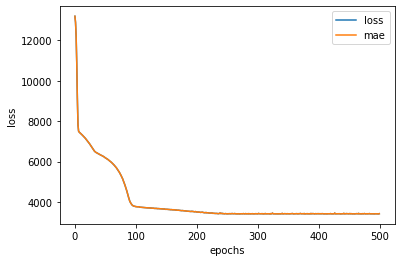

In [21]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Here we can see model_3 need 250 epochs to be at the optimal loss, lets train it on 250 epochs then.

In [22]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history = model_4.fit(
    X,
    y,
    epochs = 250,
    verbose = 0
)

In [23]:
model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3148.4502 - mae: 3148.4502


[3148.4501953125, 3148.4501953125]

In [24]:
model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3182.6116 - mae: 3182.6116


[3182.611572265625, 3182.611572265625]

Text(0.5, 0, 'epochs')

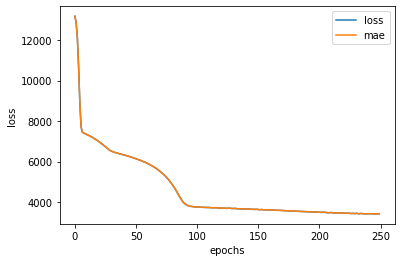

In [25]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

As we can see evaluation of model_4 didn't change a lot.

### EarlyStopp Callback

Instead of looking at hisotry plot just to prevent too long training that can lead to overfitting we can use EarlyStopp Callback

In [26]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=2
)

### Normalization and Standarization

<AxesSubplot:ylabel='Frequency'>

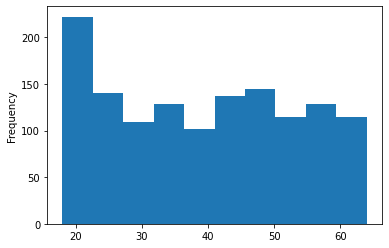

In [27]:
X['age'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

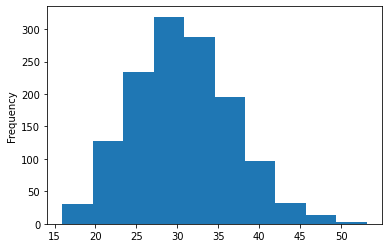

In [28]:
X['bmi'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

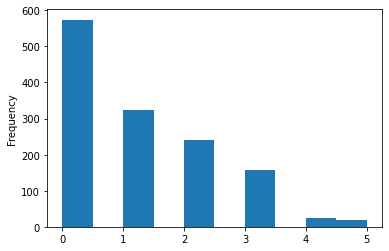

In [29]:
X['children'].plot(kind = 'hist')

#### importing

In [30]:
# importing
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
import numpy as np

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### make_column_transformer

In [31]:
# normalization + onehotencoding

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # on those columns do the minmaxscaling
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']) # on these column do onehotencoding
)

ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

#### dependent and independent features

In [32]:
# dependent and independent features

X = insurance.loc[:, insurance.columns != 'charges']
y = insurance.loc[:, ['charges']]

X, y

(      age     sex     bmi  children smoker     region
 0      19  female  27.900         0    yes  southwest
 1      18    male  33.770         1     no  southeast
 2      28    male  33.000         3     no  southeast
 3      33    male  22.705         0     no  northwest
 4      32    male  28.880         0     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1333   50    male  30.970         3     no  northwest
 1334   18  female  31.920         0     no  northeast
 1335   18  female  36.850         0     no  southeast
 1336   21  female  25.800         0     no  southwest
 1337   61  female  29.070         0    yes  northwest
 
 [1338 rows x 6 columns],           charges
 0     16884.92400
 1      1725.55230
 2      4449.46200
 3     21984.47061
 4      3866.85520
 ...           ...
 1333  10600.54830
 1334   2205.98080
 1335   1629.83350
 1336   2007.94500
 1337  29141.36030
 
 [1338 rows x 1 columns])

#### train-test split

In [33]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### fit ct to X_train and transform

You need to transform only X_train and X_test

In [34]:
# fit the ct to X_train
ct.fit(X_train)

# transform X_train and X_test
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [35]:
X_train_normal[0], X_train_normal.shape

(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]), (1070, 11))

In [36]:
X_test_normal[0], X_test_normal.shape

(array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]), (268, 11))

#### model_5

In [37]:
# model_5 (model_4 but on standarized data)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_5.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history_5 = model_5.fit(
    X_train_normal,
    y_train,
    epochs = 250,
    verbose = 0,
    callbacks = [callback]
)

In [38]:
# prediction

y_pred_5 = model_5.predict(X_test_normal).squeeze()

y_test = y_test.squeeze()

9/9 [==============================] - 0s 2ms/step


In [39]:
# mae and mse

mae_5, mse_5 = mae_mse(y_test, y_pred_5)[0].numpy(), mae_mse(y_test, y_pred_5)[1].numpy()

In [40]:
# comparing predictions

def comparingRegressionResults(model_1 = model_5, mae_1 = mae_5, mse_1 = mse_5):
                              #  model_2 = model_6, mae_2 = mae_6, mse_2 = mse_6,
                              #  model_3 = model_7, mae_3 = mae_7, mse_3 = mse_7):
  import pandas as pd

  results = [['model_5', mae_1, mse_1]]

  all_results = pd.DataFrame(results, columns = ['model', 'mae', 'mse'])

  return all_results

comparingRegressionResults()

,model,mae,mse
0,model_5,3358.562012,38087752.0


In [41]:
model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3358.5618 - mae: 3358.5618


[3358.561767578125, 3358.561767578125]

<AxesSubplot:>

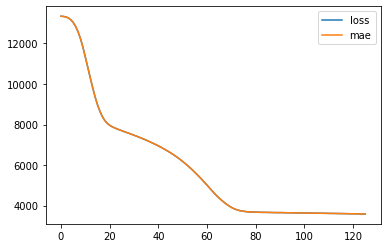

In [42]:
# history

pd.DataFrame(history_5.history).plot()

## Household Electric Power Consumption

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

wine = pd.read_csv('/content/drive/MyDrive/ALL/ML, DL, DS/All projects/Courses/Wine Quality/winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### data quality

In [3]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### X, y

In [20]:
X = wine.iloc[:,:-1]
y = wine.loc[:,'quality']

X.shape, y.shape

((1599, 11), (1599,))

In [21]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [24]:
y = pd.DataFrame(y)
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


### train_test split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1279, 11), (1279, 1), (320, 11), (320, 1))

### standarization

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [32]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [33]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


### model

In [63]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=20
)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs = 500,
    callbacks = [callback]
)

Epoch 1/500
40/40 [==============================] - 3s 8ms/step - loss: 1.0132 - mae: 1.0132
Epoch 2/500
40/40 [==============================] - 0s 7ms/step - loss: 0.6575 - mae: 0.6575
Epoch 3/500
40/40 [==============================] - 0s 7ms/step - loss: 0.6655 - mae: 0.6655
Epoch 4/500
40/40 [==============================] - 0s 7ms/step - loss: 0.5506 - mae: 0.5506
Epoch 5/500
40/40 [==============================] - 0s 7ms/step - loss: 0.5971 - mae: 0.5971
Epoch 6/500
40/40 [==============================] - 0s 6ms/step - loss: 0.5491 - mae: 0.5491
Epoch 7/500
40/40 [==============================] - 0s 5ms/step - loss: 0.6313 - mae: 0.6313
Epoch 8/500
40/40 [==============================] - 0s 5ms/step - loss: 0.5853 - mae: 0.5853
Epoch 9/500
40/40 [==============================] - 0s 6ms/step - loss: 0.5359 - mae: 0.5359
Epoch 10/500
40/40 [==============================] - 0s 7ms/step - loss: 0.5575 - mae: 0.5575
Epoch 11/500
40/40 [==============================] - 0s 9m

<AxesSubplot:>

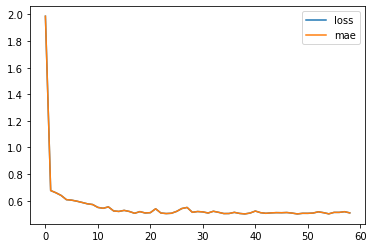

In [53]:
pd.DataFrame(history.history).plot()

### Evaluation

In [54]:
mae = model.evaluate(X_test_scaled, y_test)[0]
mae

10/10 [==============================] - 0s 3ms/step - loss: 0.5045 - mae: 0.5045


0.5045417547225952

In [55]:
y_train.median(), y_train.mean()

(quality    6.0
 dtype: float64, quality    5.623925
 dtype: float64)

In [56]:
mae / y_train.median()

quality    0.08409
dtype: float64

We have 8.4% mistake based on mae and median

### Predict

In [57]:
y_pred = model.predict(X_test_scaled)

10/10 [==============================] - 0s 3ms/step


### Visualize y_pred and y_true

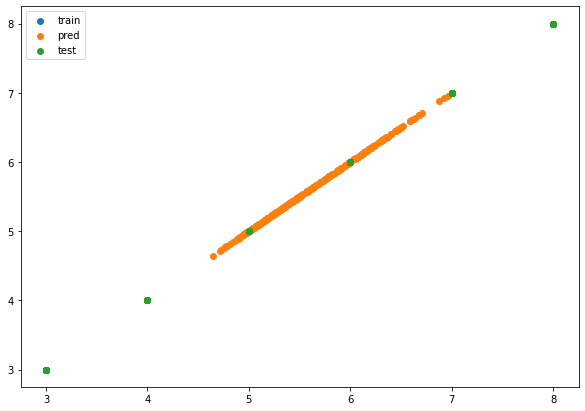

In [61]:
plt.figure(figsize = (10,7))
plt.scatter(y_train, y_train, label = 'train')
plt.scatter(y_pred, y_pred, label = 'pred')
plt.scatter(y_test, y_test, label = 'test')
plt.legend()